In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Imports

In [10]:
import torch
import segmentation_models_pytorch as smp
from model.Train import Trainer
from torch.utils.data import DataLoader, random_split
from utils.DataManager import DataManager as DM

## Params

In [11]:
epochs = 10
image_size = 224
num_classes = 1
batch_size = 16
learning_rate = 1e-4
train_ratio = 0.8
val_ratio = 0.2

In [12]:
path_rol_comp = "C:/Cours-Sorbonne/M1/Stage/src/data/rol_compressed" 
path_sim_rol_extracted_comp = "C:/Cours-Sorbonne/M1/Stage/src/data/similaires_rol_extracted_nn_compressed" 
path_filtered = "C:/Cours-Sorbonne/M1/Stage/src/data/rol_compressed/json_filtered"
path_targets = "C:/Cours-Sorbonne/M1/Stage/src/data/rol_sim_rol_triplets/targets.npy"

## Data loading / building

In [13]:
dataset = DM(path_rol_comp, path_sim_rol_extracted_comp, path_filtered, shape=(image_size, image_size), target_path=path_targets)

train_size = int(train_ratio * len(dataset))
val_size = len(dataset) - train_size

train_set, val_set = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_set, batch_size=batch_size, shuffle=True)

[INFO] Loaded exsisting targets


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


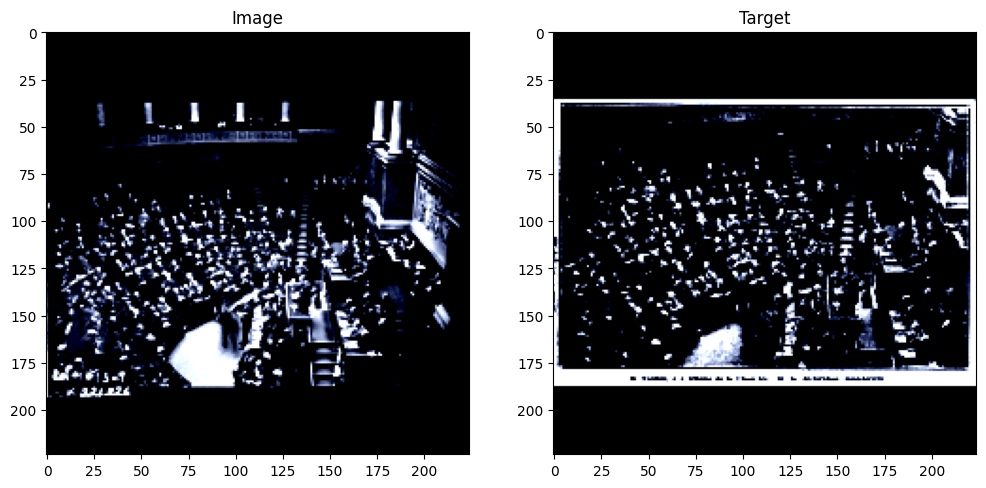

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


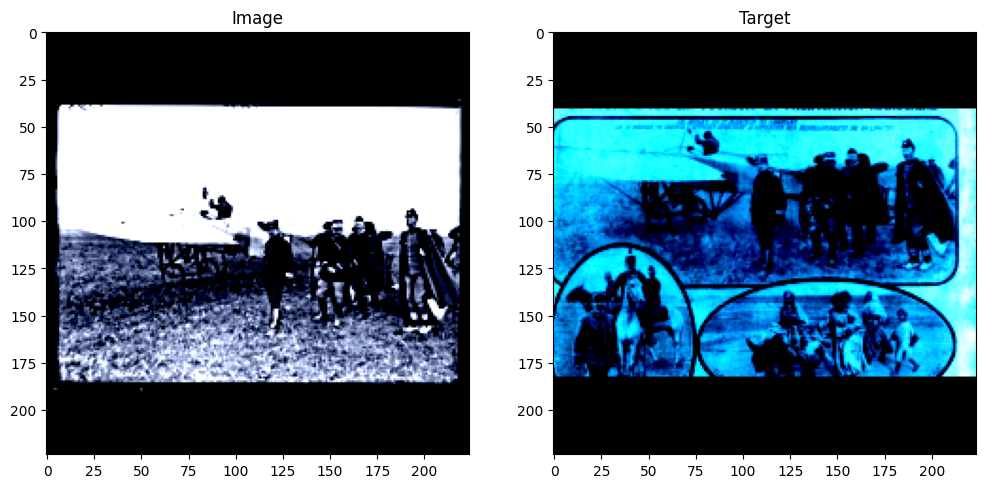

In [14]:
DM.show_data(train_loader)
DM.show_data(val_loader)

## Model Creation

In [15]:
encoder_name = 'mit_b4'
model = smp.Unet(encoder_name=encoder_name, encoder_weights='imagenet', classes=num_classes, in_channels=3)
optimizer = torch.optim.AdamW
loss_fn = torch.nn.MSELoss()

## Model Training

In [16]:
trainer = Trainer()
trainer.set_model(model) \
.set_optimizer(optimizer) \
.set_loss(loss_fn) \
.fit(train_data=train_loader, validation_data=val_loader, learning_rate=learning_rate, verbose=True, epochs=epochs)

[INFO] Model's device is : cuda


  0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
trainer.save_model()